In [1]:
import networkx as nx
import matplotlib.pyplot as plt
import itertools
import random
import numpy as np
import math

In [2]:
# Membuat Class Depo & Pelanggan
class Pelanggan:
    def __init__(self, id, kebutuhan, koordinat_x, koordinat_y):
        self.id = id
        self.kebutuhan = kebutuhan
        self.koordinat = (koordinat_x, koordinat_y)

class Depo_Air:
    def __init__(self,id,koordinat_x,koordinat_y):
        self.id = id
        self.koordinat = (koordinat_x, koordinat_y)

In [3]:
# Membuat Node
node_depo = random.sample(range(1, 14), 4)
pelanggan = []
node = np.empty([14], dtype=Pelanggan)

a = 1
b = 1

for i in range(0,14):
    if i in node_depo:
        node[i] = Depo_Air(f"depo air {a}",random.randint(-15,15),random.randint(-15,15))
        a+=1
    else:
        node[i] = Pelanggan(f"pelanggan {b}",random.randint(1,49),random.randint(-15,15),random.randint(-15,15))
        pelanggan.append(f"pelanggan {b}")
        b+=1

In [4]:
# Deklarasi Graph
G = nx.Graph()
a = 1
b = 1
labeling = {}
for i in range(14):
    G.add_node(node[i])
    if isinstance(node[i],Pelanggan):
        labeling[node[i]] = f"pelanggan {a}"
        a+=1
    else:
        labeling[node[i]] = f"depo air {b}"
        b+=1

G = nx.relabel_nodes(G,labeling)

In [5]:
# Membuat Edge
edge = list(itertools.permutations(G.nodes,2))
edge = [edge[i] for i in range(0,len(edge),6)]

for i in edge:
    G.add_edge(i[0],i[1],weight = random.randint(1,15))

In [6]:
# Create Position
position = {}
for i in range(14):
    position[node[i].id] = node[i].koordinat

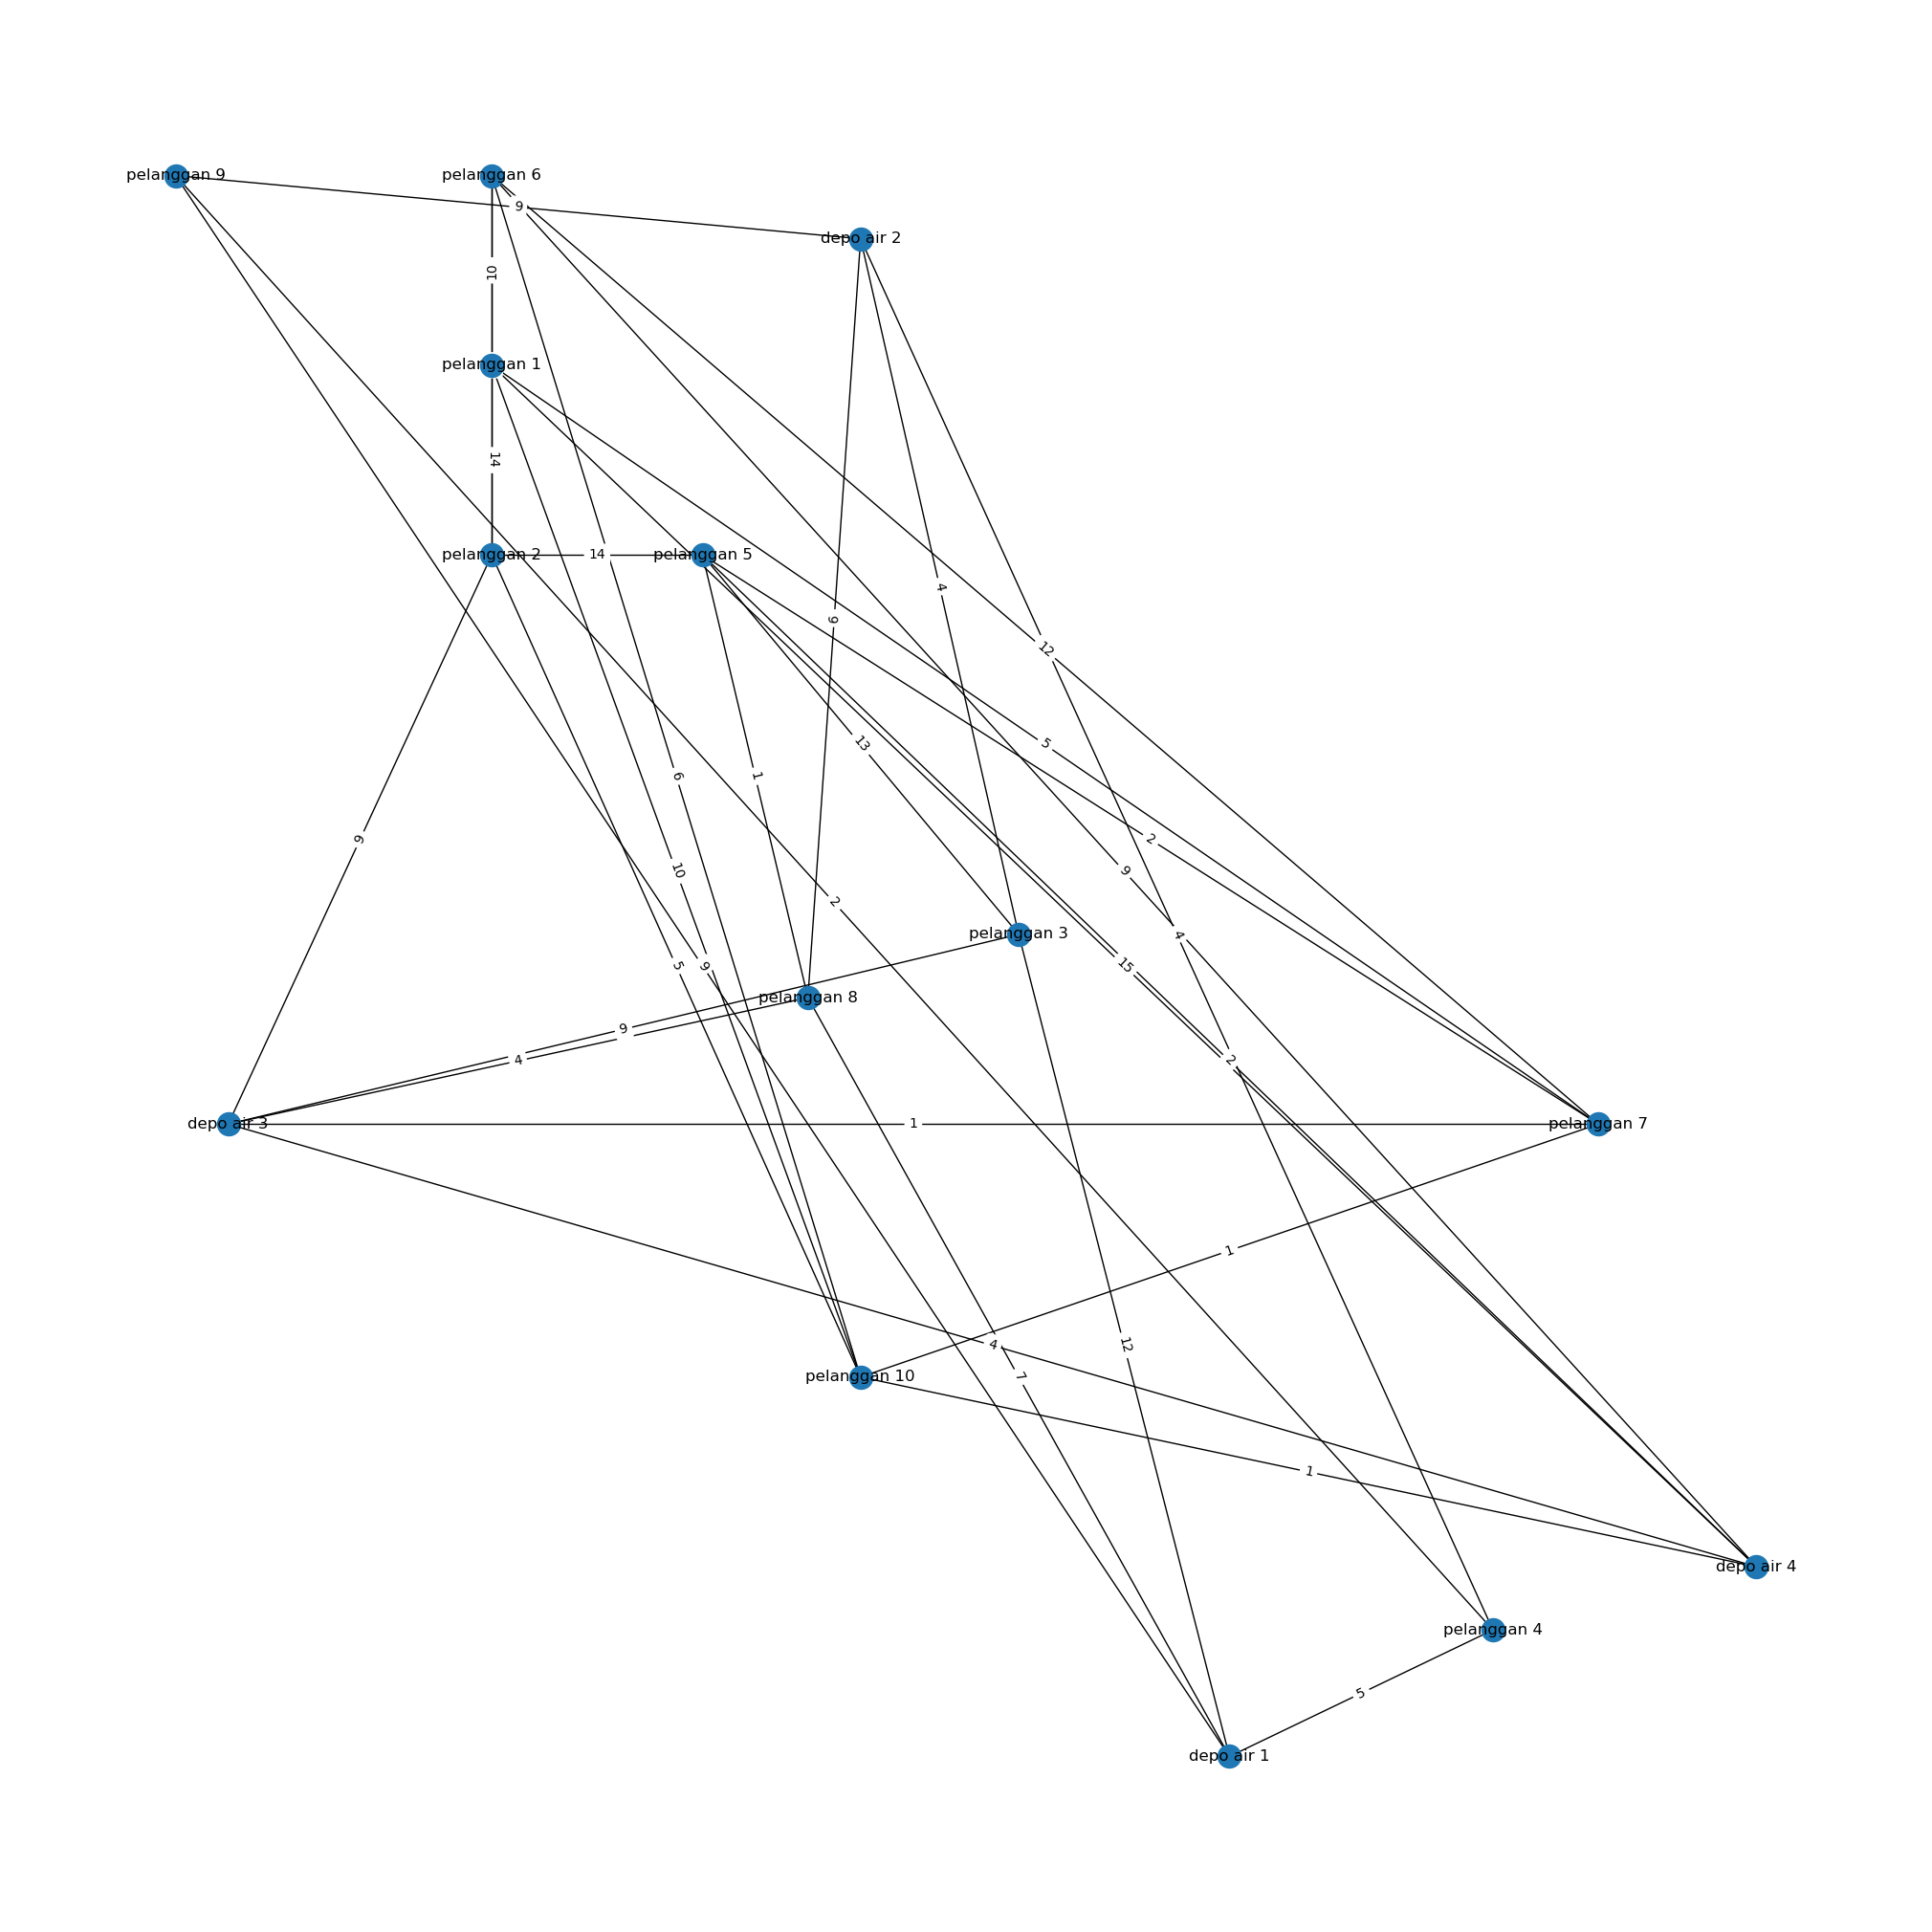

In [7]:
# Visualisasi Graph
plt.figure(figsize=(20,20))
nx.draw(G, position, with_labels=True)
labels = nx.get_edge_attributes(G, 'weight')
nx.draw_networkx_edge_labels(G, position, edge_labels=labels)
plt.show()

In [ ]:
def get_keys_from_value(dictionary, value):
    return list(filter(lambda x: dictionary[x] == value, dictionary))

def hitung_garis_lurus(start,tujuan):
    nilai_x = math.pow(position[tujuan][0] - position[start][0],2)
    nilai_y = math.pow(position[tujuan][1] - position[start][1],2)
    return math.sqrt(nilai_y + nilai_x)

def cari_pelanggan_belum(start,galon):
    tujuan = pelanggan[-1]
    heursitik_value = {}
    posible_path = [get_keys_from_value(labeling,i[1])[0] for i in sorted(G.edges(start.id,data=True), key=lambda edge: edge[2]['weight'])]    
       
    # print(posible_path)
    for i in posible_path:
        heursitik_value[i.id] = hitung_garis_lurus(i.id,tujuan)
    
    posible_path = [get_keys_from_value(labeling,i[1])[0] for i in sorted(G.edges(start.id,data=True), key=lambda edge: edge[2]['weight'] + heursitik_value[i.id])]    
    print(posible_path[0].id)
    if(tujuan in heursitik_value.keys()):
        tujuan = get_keys_from_value(labeling,tujuan)[0]
        if(galon >= tujuan.kebutuhan):
            galon -= tujuan.kebutuhan
            path.append(f"{tujuan.id} sisa galon {galon} --> ")
            telusuri(tujuan,galon)
        else:
            cari_depo(start,galon)
    else:
        if(posible_path[0].id in pelanggan and galon>= posible_path[0].kebutuhan):
            galon -= posible_path[0].kebutuhan
            path.append(f"{posible_path[0].id} sisa galon {galon} --> ")
            pelanggan.remove(posible_path[0].id)
            cari_pelanggan_belum(posible_path[0],galon)
        else:
            cari_depo(start,galon)
        
def cari_depo(start,galon):
    posible_path = [get_keys_from_value(labeling,i[1])[0] for i in sorted(G.edges(start.id,data=True), key=lambda edge: edge[2]['weight']) if "depo air" in i[1]]
    # print(f"depo calon path {calon_path}")
    if len(posible_path) == 0:
        posible_path = [get_keys_from_value(labeling,i[1])[0] for i in sorted(G.edges(start.id,data=True), key=lambda edge: edge[2]['weight']) if "pelanggan" in i[1]]
        path.append(f"mencari depo melalui {posible_path[0].id} --> ")
        print(f"mencari depo melalui {posible_path[0].id} --> ")
        cari_depo(posible_path[0],galon)
    else:
        if len(pelanggan) == 0:
            return
        # print(f"posible path {posible_path}")
        path.append(f"reload air di {posible_path[0].id} --> ")
        galon = 50
        telusuri(posible_path[0],galon)
        
def telusuri(start,galon):
    # generate all posible edge
    posible_path = [get_keys_from_value(labeling,i[1])[0] for i in sorted(G.edges(start.id,data=True), key=lambda edge: edge[2]['weight']) if i[1] in pelanggan]
    if len(posible_path) == 0:
        if len(pelanggan) == 0:
            return 0
        else:
            cari_pelanggan_belum(start,galon)
    else:
        for i in posible_path:
            # mencari key yang mana merupakan node berdasarkan nama labelingnya
            if galon >= i.kebutuhan and i.id not in closed:
                closed.append(i.id)
                galon -= i.kebutuhan
                path.append(f"{i.id} sisa galon {galon} --> ")
                pelanggan.remove(i.id)
                telusuri(i,galon)
        cari_depo(start,galon)
        
start = node[random.choice(node_depo)]
closed = []
closed2=[]
path = [f"{start.id} --> "]
tmp_path = []
galon = 50
find = telusuri(start,galon)
print(path)

: 

: 

In [ ]:
calon_path = [i[1] for i in sorted(G.edges(start.id,data=True), key=lambda edge: edge[2]['weight']) if "depo air" in i[1]]
calon_path

['depo air 1', 'depo air 4']

In [ ]:
# heuristik_value = {}
#     tujuan = pelanggan[-1]
#     # print(tujuan)
#     for i in node:
#         # Generate All Heuristik Value
#         heuristik_value[i.id] = (hitung_garis_lurus(i.id,tujuan))
#     # Sort Calon Path Berdasarkan Cost + Heursitik Value (A* Algorithm)
#     calon_path = sorted(G.edges(start.id,data=True), key=lambda edge: edge[2]['weight'] + heuristik_value[edge[1]])
#     # print(f"calon path {calon_path}")
#     # Ambil Tujuannya Saja
#     posible_path = [i[1] for i in calon_path if i[1] not in closed2]
#     print(heuristik_value)
#     if tujuan in posible_path:
#         # Mengambil index dari tujuan
#         current_node = get_keys_from_value(labeling,posible_path[posible_path.index(tujuan)])
#         galon -= current_node[0].kebutuhan
#         pelanggan.pop() # Karena sudah diantar maka dihapus dari list pelanggan
#         # path.append(f"{id} sisa galon {galon} --> ")
#         closed2.clear()
#         telusuri(current_node[0],galon,closed,path)
#     else:
#         # posible_path = [i[1] for i in calon_path if i[1] not in closed2]
#         # cost = 10000000000000
#         # for i in range(len(posible_path)):
#         #     current_node = get_keys_from_value(labeling,posible_path[0])
#         #     tmp_path.append(current_node[0].id)
#         #     closed2.append(current_node[0].id)
#         #     hasil = cari_posible_path(current_node,galon)
#         #     if hasil
#         cari_posible_path(calon_path,tujuan,galon)